# RD Kit Metrics vs Metrics - Random Forest Regression

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 2000)
from tqdm import trange

import warnings
warnings.filterwarnings("ignore")

C:\Users\ashis\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


-------

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from math import comb
from itertools import combinations
import re
from sklearn.metrics import mean_absolute_error

# Prediction of Metrics using RDKIT Descriptors  - RD KIT

Considering Median of P_Values accross all three metrics as the boundary condition for meaningful Values

In [38]:
p_val_df_significant['P_Value'].median()

0.022252281178379272

There is also the option of using the Third Quartile

In [46]:
np.percentile(p_val_df_significant['P_Value'], 75) 

0.03365016836371852

--------

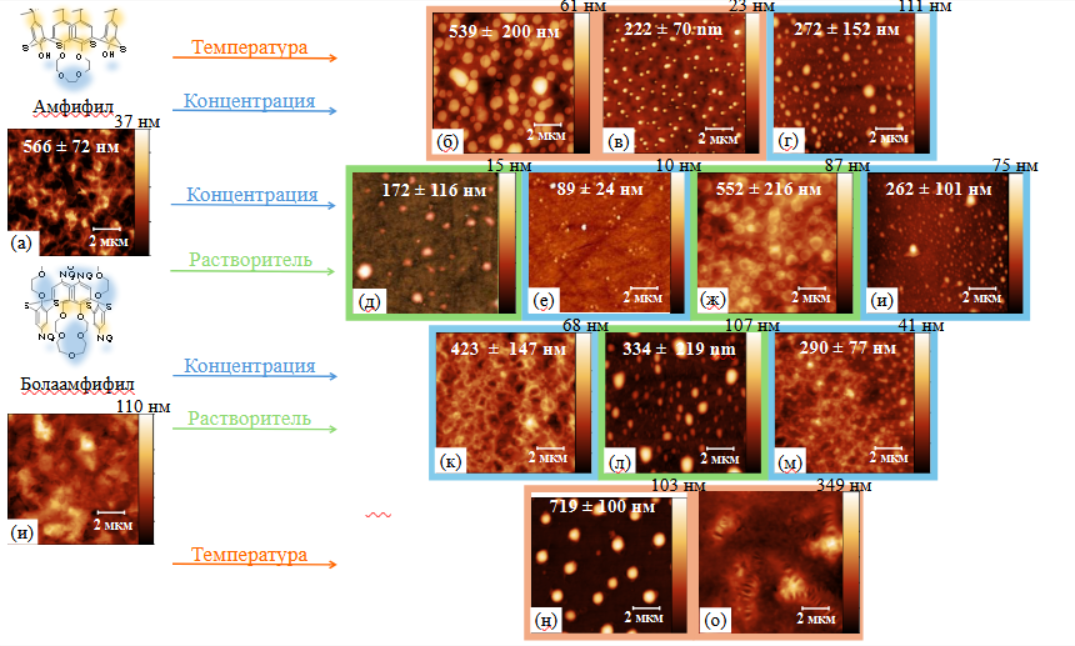

----

In [3]:
def model_maker(dataframe, case):

    flag = 0
    if case == 1:
        # mean_particle_size_(mps)
        flag = 1
        
    elif case == 2:
        # Polar_dispersity
        flag = 2
        
    elif case == 3:
        # Area_Sphere_Substance
        flag = 3
        
    data = dataframe.copy()
    data_cols = dataframe.columns[6:]
    n = len(dataframe.columns) - 6  # length of n in nCr
    perms = 0   # Stores total number of permutations possible 
    combo = []  # Sotres r for nCr
    
    for i in range(n, 0, -1):
        combo.append(i)
        perms = perms + comb(n, i)
        
    all_combinations = []
    for r in range(1, n + 1):
        combs = combinations(data_cols, r)
        all_combinations.extend(combs)
    
    
    full_frame = [] # to store result of LR for all combinations 
    temp_frame = []
    
    for a in trange(len(all_combinations)):

        if len(all_combinations[a]) == 2:
            temp_frame = data[[all_combinations[a][0],
                               all_combinations[a][1]]].copy()

        elif len(all_combinations[a]) == 3:
            temp_frame = data[[all_combinations[a][0],
                               all_combinations[a][1],
                               all_combinations[a][2]]].copy()

        elif len(all_combinations[a]) == 4:
            temp_frame = data[[all_combinations[a][0],
                               all_combinations[a][1],
                               all_combinations[a][2],
                               all_combinations[a][3]]].copy()

        else:
            temp_frame = data[[all_combinations[a][0]]].copy()

        if flag == 1:
            X_train, X_test, y_train, y_test = train_test_split(temp_frame,  
                                                        data[['mean_particle_size_(mps)']],
                                                        test_size=0.3, random_state=0)
        elif flag == 2:
            X_train, X_test, y_train, y_test = train_test_split(temp_frame,  
                                                        data[['Polar_dispersity']],
                                                        test_size=0.3, random_state=0)
        elif flag == 3:
            X_train, X_test, y_train, y_test = train_test_split(temp_frame,  
                                                        data[['Area_Sphere_Substance']],
                                                        test_size=0.3, random_state=0)
                       
        
        rf = RandomForestRegressor(n_estimators = 3
                           , max_features = 'sqrt'
                           , max_depth = 2
                           , random_state = 0).fit(X_train, y_train)
        
        # when number of 
        pred = rf.predict(X_test)
        scores = []
        coeffs = []
        desc_create = []
        #a1 = reg.coef_
        b1 = mean_squared_error(y_test, pred)
        c1 = r2_score(y_test, pred)
        d1 = mean_absolute_error(y_test, pred)
        
        if len(X_train.columns) == 1:
            desc_create = pd.DataFrame([all_combinations[a][0],'-','-','-']
                                      ).transpose().rename(columns = {0:'Desc_1',1:'Desc_2',2:'Desc_3', 3:'Desc_4'})
            scores = pd.DataFrame([b1,c1,d1]).transpose().rename(columns = {0:'MSE', 1:'r2',2:'MAE'})
            #coeffs = pd.DataFrame(a1)
            coeffs = pd.DataFrame([0,0,0,0]).transpose().rename(
                columns = {0:'C1', 1: 'C2', 2: 'C3', 3:'C4'})
            main_frame = pd.concat([desc_create,scores, coeffs], axis = 1)
            
            
        elif len(X_train.columns) == 2:
            desc_create = pd.DataFrame([all_combinations[a][0],all_combinations[a][1],'-','-']
                                      ).transpose().rename(columns = {0:'Desc_1',1:'Desc_2',2:'Desc_3', 3:'Desc_4'})
            scores = pd.DataFrame([b1,c1,d1]).transpose().rename(columns = {0:'MSE', 1:'r2',2:'MAE'})
            #coeffs = pd.DataFrame(a1)
            coeffs = pd.DataFrame([0,0,0,0]).transpose().rename(
                columns = {0:'C1', 1: 'C2', 2: 'C3', 3:'C4'})
            main_frame = pd.concat([desc_create,scores, coeffs], axis = 1)
        
        elif len(X_train.columns) == 3:
            desc_create = pd.DataFrame([all_combinations[a][0],all_combinations[a][1],all_combinations[a][2],'-']
                                      ).transpose().rename(columns = {0:'Desc_1',1:'Desc_2',2:'Desc_3', 3:'Desc_4'})
            scores = pd.DataFrame([b1,c1,d1]).transpose().rename(columns = {0:'MSE', 1:'r2',2:'MAE'})
            #coeffs = pd.DataFrame(a1)
            coeffs = pd.DataFrame([0,0,0,0]).transpose().rename(
                columns = {0:'C1', 1: 'C2', 2: 'C3', 3:'C4'})
            main_frame = pd.concat([desc_create,scores, coeffs], axis = 1)
            
        elif len(X_train.columns) == 4:
            desc_create = pd.DataFrame([all_combinations[a][0],all_combinations[a][1],all_combinations[a][2],all_combinations[a][3]]
                                      ).transpose().rename(columns = {0:'Desc_1',1:'Desc_2',2:'Desc_3', 3:'Desc_4'})
            scores = pd.DataFrame([b1,c1,d1]).transpose().rename(columns = {0:'MSE', 1:'r2',2:'MAE'})
            #coeffs = pd.DataFrame(a1)
            coeffs = pd.DataFrame([0,0,0,0]).transpose().rename(
                columns = {0:'C1', 1: 'C2', 2: 'C3', 3:'C4'})
            main_frame = pd.concat([desc_create,scores, coeffs], axis = 1)
            
               
        if a == 0:
            full_frame = main_frame.copy()
        else:
            full_frame = pd.concat([full_frame, main_frame], ignore_index = True)
        
        
    return full_frame

    Forest Size = 3 Trees

    Minimum Depth = 2 

    Node Split threshold = 2

----------

# Metric 1: Mean Particle Size

In [13]:
base_data_1 = pd.read_csv(r"Z:\Calix Paper\Calix\Results\Source_Data\Relation_1_(RDKIT)\Baseline_Metrics_MPS.csv")
base_data_1

,Comp,Solvent,T of comp,T of solv,Conc of comp,mean_particle_size_(mps),TPSA_C,PEOE_VSA6_C,PEOE_VSA6_S
0,156,1,23,23,0.00010,566.363793,77.38,130.132386,34.802820
1,156,1,23,4,0.00010,538.820596,77.38,130.132386,34.802820
2,156,1,4,23,0.00010,221.955591,77.38,130.132386,34.802820
3,156,1,23,23,0.00001,272.233927,77.38,130.132386,34.802820
4,156,2,23,23,0.00010,551.931930,77.38,130.132386,35.895287
5,156,2,23,23,0.00001,262.359462,77.38,130.132386,35.895287
6,159,1,23,23,0.00010,0.000000,264.86,47.047540,34.802820
7,159,1,23,23,0.00001,423.373199,264.86,47.047540,34.802820
8,159,2,23,23,0.00010,333.662212,264.86,47.047540,35.895287
9,159,2,23,23,0.00001,290.411224,264.86,47.047540,35.895287


In [14]:
data = base_data_1.copy()
data_cols = base_data_1.columns[6:]
n = len(base_data_1.columns) - 6  # length of n in nCr
perms = 0   # Stores total number of permutations possible 
combo = []  # Sotres r for nCr

for i in range(n, 0, -1):
    combo.append(i)
    perms = perms + comb(n, i)

all_combinations = []
for r in range(1, n + 1):
    combs = combinations(data_cols, r)
    all_combinations.extend(combs)


full_frame = [] # to store result of LR for all combinations 
temp_frame = []

for a in trange(len(all_combinations)):

    if len(all_combinations[a]) == 2:
        temp_frame = data[[all_combinations[a][0],
                           all_combinations[a][1]]].copy()

    elif len(all_combinations[a]) == 3:
        temp_frame = data[[all_combinations[a][0],
                           all_combinations[a][1],
                           all_combinations[a][2]]].copy()

    elif len(all_combinations[a]) == 4:
        temp_frame = data[[all_combinations[a][0],
                           all_combinations[a][1],
                           all_combinations[a][2],
                           all_combinations[a][3]]].copy()

    else:
        temp_frame = data[[all_combinations[a][0]]].copy()

100%|██████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 1730.63it/s]


--------

# Gird Based Hyperparameter Optimization

In [16]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV 

In [15]:
X_train, X_test, y_train, y_test = train_test_split(temp_frame,  
                                                        data[['mean_particle_size_(mps)']],
                                                        test_size=0.3, random_state=0)

In [31]:
param_grid = { 
    'n_estimators': [1,2,3,4,5], 
    'max_depth': [2, 3, 4, 5, 6, 7, 8,9,10,11, None], 
    'min_samples_split' : [2,3,4,5,6], 
    'max_features': ['sqrt', 'log2', None], 
} 


In [32]:
grid_search = GridSearchCV(RandomForestRegressor(), param_grid=param_grid) 
grid_search.fit(X_train, y_train) 
print(grid_search.best_estimator_) 


RandomForestRegressor(max_depth=2, max_features='sqrt', n_estimators=1)


In [33]:
print(grid_search.best_estimator_) 

RandomForestRegressor(max_depth=2, max_features='sqrt', n_estimators=1)


---------

# Continuing with Single Iteration tree

In [48]:
case_1 = model_maker(base_data_1,1)
case_1

100%|███████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 100.00it/s]


,Desc_1,Desc_2,Desc_3,Desc_4,MSE,r2,MAE,C1,C2,C3,C4
0,TPSA_C,-,-,-,103099.490149,-0.017412,313.332234,0,0,0,0
1,PEOE_VSA6_C,-,-,-,103099.490149,-0.017412,313.332234,0,0,0,0
2,PEOE_VSA6_S,-,-,-,113617.467079,-0.121206,332.624254,0,0,0,0
3,TPSA_C,PEOE_VSA6_C,-,-,103099.490149,-0.017412,313.332234,0,0,0,0
4,TPSA_C,PEOE_VSA6_S,-,-,120436.665065,-0.188500,334.642958,0,0,0,0
5,PEOE_VSA6_C,PEOE_VSA6_S,-,-,120436.665065,-0.188500,334.642958,0,0,0,0
6,TPSA_C,PEOE_VSA6_C,PEOE_VSA6_S,-,122127.423979,-0.205185,338.492239,0,0,0,0


In [58]:
case_1.to_csv("RF_Results_RDKIT_MPS.csv", index = False)

------

# Metric 2 = Polar Dispersity

20 Relations

In [36]:
M2_RD_Var[M2_RD_Var['P_Value']>=0.0225]

,RD_KIT_Desc,Synthesis_Metric,P_Value
0,VSA_EState2,Polar_dispersity,0.04969
1,EState_VSA8,Polar_dispersity,0.044339
2,SlogP_VSA4,Polar_dispersity,0.042655
3,NumAliphaticHeterocycles,Polar_dispersity,0.039389
4,NumAliphaticRings,Polar_dispersity,0.039389
5,EState_VSA2,Polar_dispersity,0.034788
6,NOCount,Polar_dispersity,0.030475
7,FpDensityMorgan1,Polar_dispersity,0.030069
8,EState_VSA10,Polar_dispersity,0.030002
9,fr_ether,Polar_dispersity,0.02465


In [50]:
base_data_2 = pd.read_csv(r"Z:\Calix Paper\Calix\Relation_1_(RDKIT)\Source_data\Baseline_Metrics_dispersity.csv")
base_data_2

,Comp,Solvent,T of comp,T of solv,Conc of comp,Polar_dispersity,VSA_EState2_C,Estate_VSA8_C,Estate_VSA8_S,SlogP_VSA4_C,SlogP_VSA4_S,NumAliphaticHeterocycles,NumAliphaticRings,EState_VSA2,NOCount,FpDensityMorgan1,EState_VSA10,fr_ether,TPSA
0,156,1,23,23,0.00010,0.303887,6.492710,131.615783,0.000000,0.000000,0.000000,2,2,33.158986,6,0.357143,10.213055,4,77.38
1,156,1,23,4,0.00010,0.371058,6.492710,131.615783,0.000000,0.000000,0.000000,2,2,33.158986,6,0.357143,10.213055,4,77.38
2,156,1,4,23,0.00010,0.315315,6.492710,131.615783,0.000000,0.000000,0.000000,2,2,33.158986,6,0.357143,10.213055,4,77.38
3,156,1,23,23,0.00001,0.558824,6.492710,131.615783,0.000000,0.000000,0.000000,2,2,33.158986,6,0.357143,10.213055,4,77.38
4,156,2,23,23,0.00010,0.391304,6.492710,131.615783,19.056471,0.000000,6.923737,2,2,33.158986,6,0.357143,10.213055,4,77.38
5,156,2,23,23,0.00001,0.385496,6.492710,131.615783,19.056471,0.000000,6.923737,2,2,33.158986,6,0.357143,10.213055,4,77.38
6,159,1,23,23,0.00010,0.000000,49.043023,0.000000,0.000000,40.457273,0.000000,3,3,167.872027,22,0.287879,40.457273,10,264.86
7,159,1,23,23,0.00001,0.347518,49.043023,0.000000,0.000000,40.457273,0.000000,3,3,167.872027,22,0.287879,40.457273,10,264.86
8,159,2,23,23,0.00010,0.655689,49.043023,0.000000,19.056471,40.457273,6.923737,3,3,167.872027,22,0.287879,40.457273,10,264.86
9,159,2,23,23,0.00001,0.265517,49.043023,0.000000,19.056471,40.457273,6.923737,3,3,167.872027,22,0.287879,40.457273,10,264.86


In [51]:
res_2 = model_maker(base_data_2,2)
res_2

100%|█████████████████████████████████████████████████████████████████████████████| 8191/8191 [01:15<00:00, 108.01it/s]


,Desc_1,Desc_2,Desc_3,Desc_4,MSE,r2,MAE,C1,C2,C3,C4
0,VSA_EState2_C,-,-,-,0.085674,-2.355306,0.252020,0,0,0,0
1,Estate_VSA8_C,-,-,-,0.085674,-2.355306,0.252020,0,0,0,0
2,Estate_VSA8_S,-,-,-,0.092406,-2.618949,0.259685,0,0,0,0
3,SlogP_VSA4_C,-,-,-,0.085674,-2.355306,0.252020,0,0,0,0
4,SlogP_VSA4_S,-,-,-,0.092406,-2.618949,0.259685,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
8186,VSA_EState2_C,-,-,-,0.085674,-2.355306,0.252020,0,0,0,0
8187,VSA_EState2_C,-,-,-,0.085674,-2.355306,0.252020,0,0,0,0
8188,VSA_EState2_C,-,-,-,0.085674,-2.355306,0.252020,0,0,0,0
8189,Estate_VSA8_C,-,-,-,0.085674,-2.355306,0.252020,0,0,0,0


In [59]:
res_2.to_csv("RF_Results_RDKIT_Dispersity.csv", index = False)

----

# Metric 3 = Ratio of Sphere vs Substance area 

20 relations

In [33]:
M3_RD_Var = p_val_df_significant[p_val_df_significant['Synthesis_Metric']=='Area_Sphere_Substance'].reset_index(drop = True)


In [37]:
M3_RD_Var[M3_RD_Var['P_Value']>=0.0225]

,RD_KIT_Desc,Synthesis_Metric,P_Value
0,VSA_EState2,Area_Sphere_Substance,0.048817
1,EState_VSA8,Area_Sphere_Substance,0.044045
2,SlogP_VSA4,Area_Sphere_Substance,0.041731
3,EState_VSA2,Area_Sphere_Substance,0.034603
4,EState_VSA10,Area_Sphere_Substance,0.029332
5,NOCount,Area_Sphere_Substance,0.029227
6,NumAliphaticRings,Area_Sphere_Substance,0.029113
7,NumAliphaticHeterocycles,Area_Sphere_Substance,0.029113
8,TPSA,Area_Sphere_Substance,0.022936


In [61]:
base_data_3 = pd.read_csv(r"Z:\Calix Paper\Calix\Relation_1_(RDKIT)\Source_data\Baseline_Metrics_Ratio_Sphere-substance.csv")
base_data_3

,Comp,Solvent,T of comp,T of solv,Conc of comp,Area_Sphere_Substance,VSA_EState2,Estate_VSA8_C,Estate_VSA8_S,SlogP_VSA4_C,SlogP_VSA4_S,EState_VSA2,EState_VSA10,NOCount,NumAliphaticHeterocycles,NumAliphaticRings,TPSA
0,156,1,23,23,0.00010,0.4424,6.492710,131.615783,0.000000,0.000000,0.000000,33.158986,10.213055,6,2,2,77.38
1,156,1,23,4,0.00010,0.4434,6.492710,131.615783,0.000000,0.000000,0.000000,33.158986,10.213055,6,2,2,77.38
2,156,1,4,23,0.00010,0.1225,6.492710,131.615783,0.000000,0.000000,0.000000,33.158986,10.213055,6,2,2,77.38
3,156,1,23,23,0.00001,0.3281,6.492710,131.615783,0.000000,0.000000,0.000000,33.158986,10.213055,6,2,2,77.38
4,156,2,23,23,0.00010,0.4510,6.492710,131.615783,19.056471,0.000000,6.923737,33.158986,10.213055,6,2,2,77.38
5,156,2,23,23,0.00001,0.0391,6.492710,131.615783,19.056471,0.000000,6.923737,33.158986,10.213055,6,2,2,77.38
6,159,1,23,23,0.00010,0.0000,49.043023,0.000000,0.000000,40.457273,0.000000,167.872027,40.457273,22,3,3,264.86
7,159,1,23,23,0.00001,0.4323,49.043023,0.000000,0.000000,40.457273,0.000000,167.872027,40.457273,22,3,3,264.86
8,159,2,23,23,0.00010,0.2474,49.043023,0.000000,19.056471,40.457273,6.923737,167.872027,40.457273,22,3,3,264.86
9,159,2,23,23,0.00001,0.2629,49.043023,0.000000,19.056471,40.457273,6.923737,167.872027,40.457273,22,3,3,264.86


In [62]:
res_3 = model_maker(base_data_3,3)
res_3

100%|█████████████████████████████████████████████████████████████████████████████| 2047/2047 [00:19<00:00, 107.49it/s]


,Desc_1,Desc_2,Desc_3,Desc_4,MSE,r2,MAE,C1,C2,C3,C4
0,VSA_EState2,-,-,-,0.063172,-0.771185,0.225152,0,0,0,0
1,Estate_VSA8_C,-,-,-,0.063172,-0.771185,0.225152,0,0,0,0
2,Estate_VSA8_S,-,-,-,0.069389,-0.945473,0.241674,0,0,0,0
3,SlogP_VSA4_C,-,-,-,0.063172,-0.771185,0.225152,0,0,0,0
4,SlogP_VSA4_S,-,-,-,0.069389,-0.945473,0.241674,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2042,VSA_EState2,-,-,-,0.063172,-0.771185,0.225152,0,0,0,0
2043,VSA_EState2,-,-,-,0.063172,-0.771185,0.225152,0,0,0,0
2044,VSA_EState2,-,-,-,0.063172,-0.771185,0.225152,0,0,0,0
2045,Estate_VSA8_C,-,-,-,0.063172,-0.771185,0.225152,0,0,0,0


In [63]:
res_3.to_csv("RF_Results_RDKIT_Ratio_Sphere_Substance.csv", index = False)

----

--------

# PHASE 2: Synthesis Conditions versus Metrics


# Mean Particle Size

In [65]:
base_data_4 = pd.read_csv(r"Z:\Calix Paper\Calix\Relation_2_(Synthesis_Conditions)\Source_Data\Baseline_Metrics_MPS.csv")
base_data_4

,Comp,Solvent,T of comp,T of solv,Conc of comp,mean_particle_size_(mps),Comp.1,T of comp.1,T of solv.1,hydrophilic,hydrophilic_section,hydrophbic_section,Conc of comp.1
0,156,1,23,23,0.00010,566.363793,156,23,23,1074.3192,0.578597,0.549443,0.00010
1,156,1,23,4,0.00010,538.820596,156,23,4,1074.3192,0.578597,0.549443,0.00010
2,156,1,4,23,0.00010,221.955591,156,4,23,1074.3192,0.578597,0.549443,0.00010
3,156,1,23,23,0.00001,272.233927,156,23,23,1074.3192,0.578597,0.549443,0.00001
4,156,2,23,23,0.00010,551.931930,156,23,23,1068.2255,0.590875,0.551821,0.00010
5,156,2,23,23,0.00001,262.359462,156,23,23,1068.2255,0.590875,0.551821,0.00001
6,159,1,23,23,0.00010,0.000000,159,23,23,3387.1829,0.433544,0.509058,0.00010
7,159,1,23,23,0.00001,423.373199,159,23,23,3387.1829,0.433544,0.509058,0.00001
8,159,2,23,23,0.00010,333.662212,159,23,23,3435.9498,0.433292,0.516996,0.00010
9,159,2,23,23,0.00001,290.411224,159,23,23,3435.9498,0.433292,0.516996,0.00001


In [66]:
res_4 = model_maker(base_data_4,1)
res_4

100%|███████████████████████████████████████████████████████████████████████████████| 127/127 [00:01<00:00, 106.71it/s]


,Desc_1,Desc_2,Desc_3,Desc_4,MSE,r2,MAE,C1,C2,C3,C4
0,Comp.1,-,-,-,103099.490149,-0.017412,313.332234,0,0,0,0
1,T of comp.1,-,-,-,88720.111046,0.124487,285.423476,0,0,0,0
2,T of solv.1,-,-,-,84474.278507,0.166386,284.283216,0,0,0,0
3,hydrophilic,-,-,-,118438.088157,-0.168777,329.696696,0,0,0,0
4,hydrophilic_section,-,-,-,118438.088157,-0.168777,329.696696,0,0,0,0
5,hydrophbic_section,-,-,-,118438.088157,-0.168777,329.696696,0,0,0,0
6,Conc of comp.1,-,-,-,109956.983254,-0.085084,313.802256,0,0,0,0
7,Comp.1,T of comp.1,-,-,90686.037025,0.105087,288.223320,0,0,0,0
8,Comp.1,T of solv.1,-,-,97240.183315,0.040409,306.975482,0,0,0,0
9,Comp.1,hydrophilic,-,-,118438.088157,-0.168777,329.696696,0,0,0,0


In [67]:
res_4.to_csv("RF_Results_Synthesis_Conditions-MPS.csv", index = False)

---------

# Metric 2: Poly Dispersity

In [68]:
base_data_5 = pd.read_csv(r"Z:\Calix Paper\Calix\Relation_2_(Synthesis_Conditions)\Source_Data\Baseline_Metrics_Polar_Dispersity.csv")
base_data_5

,Comp,Solvent,T of comp,T of solv,Conc of comp,Polar_dispersity,hydrophilic_section,hydrophbic_section,Full_molecule,hydrophilic
0,156,1,23,23,0.00010,0.303887,0.578597,0.549443,0.584598,1074.3192
1,156,1,23,4,0.00010,0.371058,0.578597,0.549443,0.584598,1074.3192
2,156,1,4,23,0.00010,0.315315,0.578597,0.549443,0.584598,1074.3192
3,156,1,23,23,0.00001,0.558824,0.578597,0.549443,0.584598,1074.3192
4,156,2,23,23,0.00010,0.391304,0.590875,0.551821,0.587235,1068.2255
5,156,2,23,23,0.00001,0.385496,0.590875,0.551821,0.587235,1068.2255
6,159,1,23,23,0.00010,0.000000,0.433544,0.509058,0.670052,3387.1829
7,159,1,23,23,0.00001,0.347518,0.433544,0.509058,0.670052,3387.1829
8,159,2,23,23,0.00010,0.655689,0.433292,0.516996,0.651590,3435.9498
9,159,2,23,23,0.00001,0.265517,0.433292,0.516996,0.651590,3435.9498


In [69]:
res_5 = model_maker(base_data_5,2)
res_5

100%|█████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 104.03it/s]


,Desc_1,Desc_2,Desc_3,Desc_4,MSE,r2,MAE,C1,C2,C3,C4
0,hydrophilic_section,-,-,-,0.071292,-1.792072,0.229287,0,0,0,0
1,hydrophbic_section,-,-,-,0.071292,-1.792072,0.229287,0,0,0,0
2,Full_molecule,-,-,-,0.071292,-1.792072,0.229287,0,0,0,0
3,hydrophilic,-,-,-,0.071292,-1.792072,0.229287,0,0,0,0
4,hydrophilic_section,hydrophbic_section,-,-,0.071292,-1.792072,0.229287,0,0,0,0
5,hydrophilic_section,Full_molecule,-,-,0.071292,-1.792072,0.229287,0,0,0,0
6,hydrophilic_section,hydrophilic,-,-,0.071292,-1.792072,0.229287,0,0,0,0
7,hydrophbic_section,Full_molecule,-,-,0.071292,-1.792072,0.229287,0,0,0,0
8,hydrophbic_section,hydrophilic,-,-,0.071292,-1.792072,0.229287,0,0,0,0
9,Full_molecule,hydrophilic,-,-,0.071292,-1.792072,0.229287,0,0,0,0


In [70]:
res_5.to_csv("RF_Results_Synthesis_Conditions-Dispersity.csv", index = False)

-------

# Metric 3: Ratio Sphere Substance

In [71]:
base_data_6 = pd.read_csv(r"Z:\Calix Paper\Calix\Relation_2_(Synthesis_Conditions)\Source_Data\Baseline_Metrics_Ratio_Sphere_Substance.csv")
base_data_6

,Comp,Solvent,T of comp,T of solv,Conc of comp,Area_Sphere_Substance,hydrophilic_section,hydrophbic_section,hydrophilic
0,156,1,23,23,0.00010,0.4424,0.578597,0.549443,1074.3192
1,156,1,23,4,0.00010,0.4434,0.578597,0.549443,1074.3192
2,156,1,4,23,0.00010,0.1225,0.578597,0.549443,1074.3192
3,156,1,23,23,0.00001,0.3281,0.578597,0.549443,1074.3192
4,156,2,23,23,0.00010,0.4510,0.590875,0.551821,1068.2255
5,156,2,23,23,0.00001,0.0391,0.590875,0.551821,1068.2255
6,159,1,23,23,0.00010,0.0000,0.433544,0.509058,3387.1829
7,159,1,23,23,0.00001,0.4323,0.433544,0.509058,3387.1829
8,159,2,23,23,0.00010,0.2474,0.433292,0.516996,3435.9498
9,159,2,23,23,0.00001,0.2629,0.433292,0.516996,3435.9498


In [72]:
res_6 = model_maker(base_data_6,3)
res_6

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 97.47it/s]


,Desc_1,Desc_2,Desc_3,Desc_4,MSE,r2,MAE,C1,C2,C3,C4
0,hydrophilic_section,-,-,-,0.107064,-2.001781,0.297995,0,0,0,0
1,hydrophbic_section,-,-,-,0.107064,-2.001781,0.297995,0,0,0,0
2,hydrophilic,-,-,-,0.107064,-2.001781,0.297995,0,0,0,0
3,hydrophilic_section,hydrophbic_section,-,-,0.107064,-2.001781,0.297995,0,0,0,0
4,hydrophilic_section,hydrophilic,-,-,0.107064,-2.001781,0.297995,0,0,0,0
5,hydrophbic_section,hydrophilic,-,-,0.107064,-2.001781,0.297995,0,0,0,0
6,hydrophilic_section,hydrophbic_section,hydrophilic,-,0.107064,-2.001781,0.297995,0,0,0,0


In [73]:
res_6.to_csv("RF_Results_Synthesis_Conditions-Ratio_Sphere_Substance.csv", index = False)

-----

---------

## Phase 3: Hybrid Model 

In [74]:
base_data_7 = pd.read_csv(r"Z:\Calix Paper\Calix\Relation_3_(RD-desc_SYnthesis)\Data_Synthesis_MPS.csv")
base_data_7

,Comp,Solvent,T of comp,T of solv,Conc of comp,mean_particle_size_(mps),TPSA_C,PEOE_VSA6_C,PEOE_VSA6_S,Comp.1,T of comp.1,T of solv.1,hydrophilic,hydrophilic_section,hydrophbic_section,Conc of comp.1
0,156,Chloroform,23,23,0.00010,566,77.38,130.132386,34.802820,156,23,23,1074.3192,0.578597,0.549443,0.00010
1,156,Chloroform,23,4,0.00010,539,77.38,130.132386,34.802820,156,23,4,1074.3192,0.578597,0.549443,0.00010
2,156,Chloroform,4,23,0.00010,222,77.38,130.132386,34.802820,156,4,23,1074.3192,0.578597,0.549443,0.00010
3,156,Chloroform,23,23,0.00001,272,77.38,130.132386,34.802820,156,23,23,1074.3192,0.578597,0.549443,0.00001
4,156,Toluene,23,23,0.00010,552,77.38,130.132386,35.895287,156,23,23,1068.2255,0.590875,0.551821,0.00010
5,156,Toluene,23,23,0.00001,262,77.38,130.132386,35.895287,156,23,23,1068.2255,0.590875,0.551821,0.00001
6,159,Chloroform,23,23,0.00010,0,264.86,47.047540,34.802820,159,23,23,3387.1829,0.433544,0.509058,0.00010
7,159,Chloroform,23,23,0.00001,423,264.86,47.047540,34.802820,159,23,23,3387.1829,0.433544,0.509058,0.00001
8,159,Toluene,23,23,0.00010,334,264.86,47.047540,35.895287,159,23,23,3435.9498,0.433292,0.516996,0.00010
9,159,Toluene,23,23,0.00001,290,264.86,47.047540,35.895287,159,23,23,3435.9498,0.433292,0.516996,0.00001


In [75]:
res_7 = model_maker(base_data_7,1)
res_7

100%|█████████████████████████████████████████████████████████████████████████████| 1023/1023 [00:09<00:00, 106.09it/s]


,Desc_1,Desc_2,Desc_3,Desc_4,MSE,r2,MAE,C1,C2,C3,C4
0,TPSA_C,-,-,-,105847.989167,-0.013373,317.241667,0,0,0,0
1,PEOE_VSA6_C,-,-,-,105847.989167,-0.013373,317.241667,0,0,0,0
2,PEOE_VSA6_S,-,-,-,116215.342451,-0.112628,336.573413,0,0,0,0
3,Comp.1,-,-,-,105847.989167,-0.013373,317.241667,0,0,0,0
4,T of comp.1,-,-,-,91211.613426,0.126754,289.402778,0,0,0,0
5,T of solv.1,-,-,-,86386.748063,0.172946,288.164683,0,0,0,0
6,hydrophilic,-,-,-,120613.322500,-0.154734,333.575000,0,0,0,0
7,hydrophilic_section,-,-,-,120613.322500,-0.154734,333.575000,0,0,0,0
8,hydrophbic_section,-,-,-,120613.322500,-0.154734,333.575000,0,0,0,0
9,Conc of comp.1,-,-,-,112357.361111,-0.075693,317.750000,0,0,0,0


In [76]:
res_7.to_csv("RF_Phase_3_Results_Hybrid_Conditions-MPS.csv", index = False)

----------

# Dispersity

In [77]:
base_data_8 = pd.read_csv(r"Z:\Calix Paper\Calix\Relation_3_(RD-desc_SYnthesis)\Data_Synthesis_Dispersity.csv")
base_data_8

,Comp,Solvent,T of comp,T of solv,Conc of comp,Polar_dispersity,VSA_EState2_C,Estate_VSA8_C,Estate_VSA8_S,SlogP_VSA4_C,SlogP_VSA4_S,NumAliphaticHeterocycles,NumAliphaticRings,EState_VSA2,NOCount,FpDensityMorgan1,EState_VSA10,fr_ether,TPSA,hydrophilic_section,hydrophbic_section,Full_molecule,hydrophilic
0,156,Chloroform,23,23,0.00010,0.303887,6.492710,131.615783,0.000000,0.000000,0.000000,2,2,33.158986,6,0.357143,10.213055,4,77.38,0.578597,0.549443,0.584598,1074.3192
1,156,Chloroform,23,4,0.00010,0.371058,6.492710,131.615783,0.000000,0.000000,0.000000,2,2,33.158986,6,0.357143,10.213055,4,77.38,0.578597,0.549443,0.584598,1074.3192
2,156,Chloroform,4,23,0.00010,0.315315,6.492710,131.615783,0.000000,0.000000,0.000000,2,2,33.158986,6,0.357143,10.213055,4,77.38,0.578597,0.549443,0.584598,1074.3192
3,156,Chloroform,23,23,0.00001,0.558824,6.492710,131.615783,0.000000,0.000000,0.000000,2,2,33.158986,6,0.357143,10.213055,4,77.38,0.578597,0.549443,0.584598,1074.3192
4,156,Toluene,23,23,0.00010,0.391304,6.492710,131.615783,19.056471,0.000000,6.923737,2,2,33.158986,6,0.357143,10.213055,4,77.38,0.590875,0.551821,0.587235,1068.2255
5,156,Toluene,23,23,0.00001,0.385496,6.492710,131.615783,19.056471,0.000000,6.923737,2,2,33.158986,6,0.357143,10.213055,4,77.38,0.590875,0.551821,0.587235,1068.2255
6,159,Chloroform,23,23,0.00010,0.000000,49.043023,0.000000,0.000000,40.457273,0.000000,3,3,167.872027,22,0.287879,40.457273,10,264.86,0.433544,0.509058,0.670052,3387.1829
7,159,Chloroform,23,23,0.00001,0.347518,49.043023,0.000000,0.000000,40.457273,0.000000,3,3,167.872027,22,0.287879,40.457273,10,264.86,0.433544,0.509058,0.670052,3387.1829
8,159,Toluene,23,23,0.00010,0.655689,49.043023,0.000000,19.056471,40.457273,6.923737,3,3,167.872027,22,0.287879,40.457273,10,264.86,0.433292,0.516996,0.651590,3435.9498
9,159,Toluene,23,23,0.00001,0.265517,49.043023,0.000000,19.056471,40.457273,6.923737,3,3,167.872027,22,0.287879,40.457273,10,264.86,0.433292,0.516996,0.651590,3435.9498


In [78]:
res_8 = model_maker(base_data_8,2)
res_8

100%|██████████████████████████████████████████████████████████████████████████| 131071/131071 [50:40<00:00, 43.11it/s]


,Desc_1,Desc_2,Desc_3,Desc_4,MSE,r2,MAE,C1,C2,C3,C4
0,VSA_EState2_C,-,-,-,0.085674,-2.355306,0.252020,0,0,0,0
1,Estate_VSA8_C,-,-,-,0.085674,-2.355306,0.252020,0,0,0,0
2,Estate_VSA8_S,-,-,-,0.092406,-2.618949,0.259685,0,0,0,0
3,SlogP_VSA4_C,-,-,-,0.085674,-2.355306,0.252020,0,0,0,0
4,SlogP_VSA4_S,-,-,-,0.092406,-2.618949,0.259685,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
131066,VSA_EState2_C,-,-,-,0.085674,-2.355306,0.252020,0,0,0,0
131067,VSA_EState2_C,-,-,-,0.085674,-2.355306,0.252020,0,0,0,0
131068,VSA_EState2_C,-,-,-,0.085674,-2.355306,0.252020,0,0,0,0
131069,Estate_VSA8_C,-,-,-,0.085674,-2.355306,0.252020,0,0,0,0


In [79]:
res_8.to_csv("RF_Phase_3_Results_Hybrid_Conditions-Dispersity.csv", index = False)

------

# Ration of Sphere Vs substance

In [80]:
base_data_9 = pd.read_csv(r"Z:\Calix Paper\Calix\Relation_3_(RD-desc_SYnthesis)\Data_Synthesis_A1A2.csv")
base_data_9

,Comp,Solvent,T of comp,T of solv,Conc of comp,Area_Sphere_Substance,hydrophilic_section,hydrophbic_section,hydrophilic,VSA_EState2,Estate_VSA8_C,Estate_VSA8_S,SlogP_VSA4_C,SlogP_VSA4_S,EState_VSA2,EState_VSA10,NOCount,NumAliphaticHeterocycles,NumAliphaticRings,TPSA
0,156,1,23,23,0.00010,0.4424,0.578597,0.549443,1074.3192,6.492710,131.615783,0.000000,0.000000,0.000000,33.158986,10.213055,6,2,2,77.38
1,156,1,23,4,0.00010,0.4434,0.578597,0.549443,1074.3192,6.492710,131.615783,0.000000,0.000000,0.000000,33.158986,10.213055,6,2,2,77.38
2,156,1,4,23,0.00010,0.1225,0.578597,0.549443,1074.3192,6.492710,131.615783,0.000000,0.000000,0.000000,33.158986,10.213055,6,2,2,77.38
3,156,1,23,23,0.00001,0.3281,0.578597,0.549443,1074.3192,6.492710,131.615783,0.000000,0.000000,0.000000,33.158986,10.213055,6,2,2,77.38
4,156,2,23,23,0.00010,0.4510,0.590875,0.551821,1068.2255,6.492710,131.615783,19.056471,0.000000,6.923737,33.158986,10.213055,6,2,2,77.38
5,156,2,23,23,0.00001,0.0391,0.590875,0.551821,1068.2255,6.492710,131.615783,19.056471,0.000000,6.923737,33.158986,10.213055,6,2,2,77.38
6,159,1,23,23,0.00010,0.0000,0.433544,0.509058,3387.1829,49.043023,0.000000,0.000000,40.457273,0.000000,167.872027,40.457273,22,3,3,264.86
7,159,1,23,23,0.00001,0.4323,0.433544,0.509058,3387.1829,49.043023,0.000000,0.000000,40.457273,0.000000,167.872027,40.457273,22,3,3,264.86
8,159,2,23,23,0.00010,0.2474,0.433292,0.516996,3435.9498,49.043023,0.000000,19.056471,40.457273,6.923737,167.872027,40.457273,22,3,3,264.86
9,159,2,23,23,0.00001,0.2629,0.433292,0.516996,3435.9498,49.043023,0.000000,19.056471,40.457273,6.923737,167.872027,40.457273,22,3,3,264.86


In [81]:
res_9 = model_maker(base_data_9,3)
res_9

100%|████████████████████████████████████████████████████████████████████████████| 16383/16383 [03:22<00:00, 80.90it/s]


,Desc_1,Desc_2,Desc_3,Desc_4,MSE,r2,MAE,C1,C2,C3,C4
0,hydrophilic_section,-,-,-,0.107064,-2.001781,0.297995,0,0,0,0
1,hydrophbic_section,-,-,-,0.107064,-2.001781,0.297995,0,0,0,0
2,hydrophilic,-,-,-,0.107064,-2.001781,0.297995,0,0,0,0
3,VSA_EState2,-,-,-,0.063172,-0.771185,0.225152,0,0,0,0
4,Estate_VSA8_C,-,-,-,0.063172,-0.771185,0.225152,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
16378,hydrophilic_section,-,-,-,0.107064,-2.001781,0.297995,0,0,0,0
16379,hydrophilic_section,-,-,-,0.107064,-2.001781,0.297995,0,0,0,0
16380,hydrophilic_section,-,-,-,0.107064,-2.001781,0.297995,0,0,0,0
16381,hydrophbic_section,-,-,-,0.107064,-2.001781,0.297995,0,0,0,0


In [82]:
res_9.to_csv("RF_Phase_3_Results_Hybrid_Conditions-Ratio_A1-A2.csv", index = False)

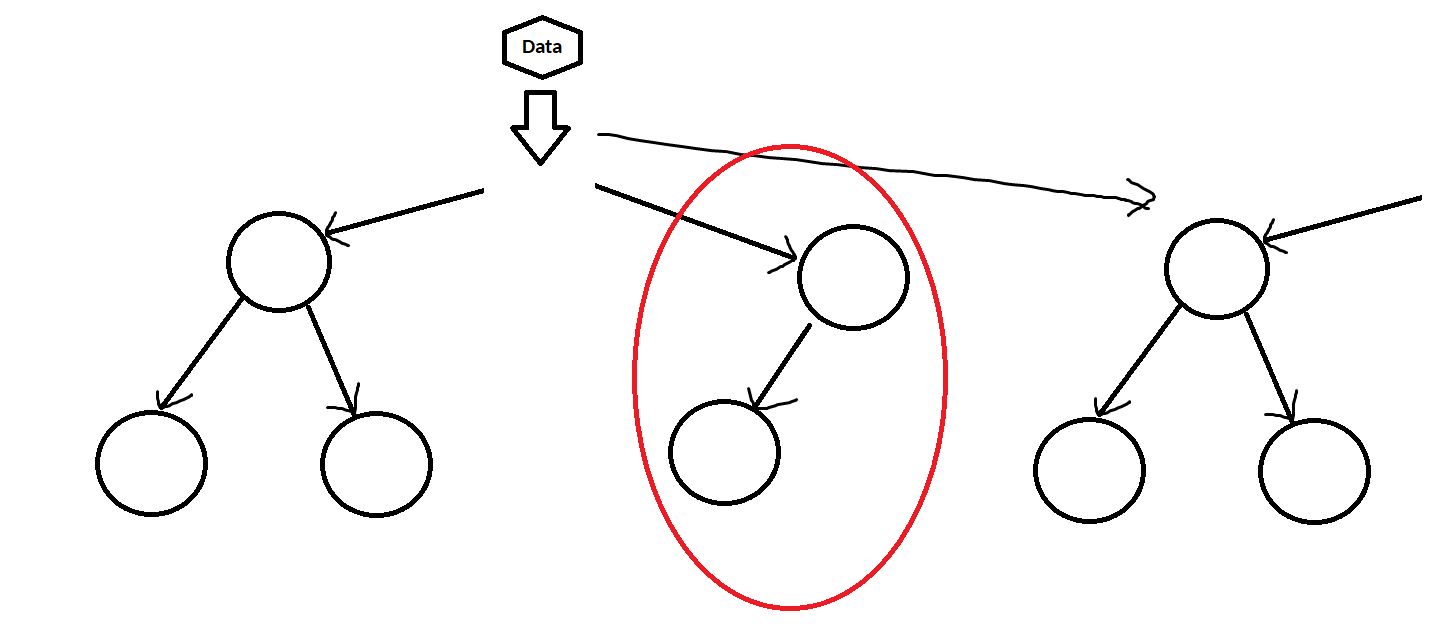

------